In [1]:
#start by importing relevant packages
import numpy as np
import pandas as pd

# Frame the Problem

## Clean the data 

In [2]:
#import the data and look at the info of the data set and preview the first five rows
df_test=pd.read_csv("test.csv")
df_train=pd.read_csv("train.csv")

print(df_train.shape)
display(df_train.info())
display(df_train.head())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

None

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

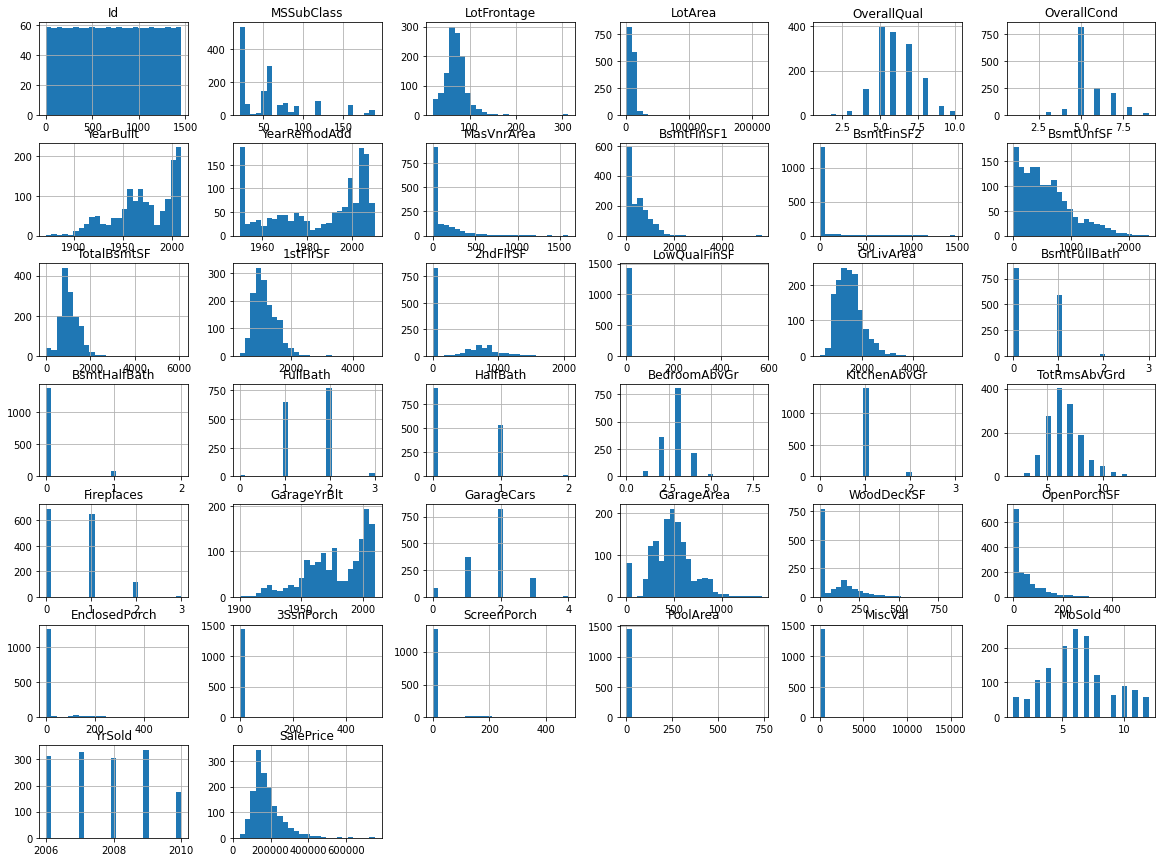

In [3]:
#quickly visualize the training data-histograms
df_train.hist(bins=25, figsize=(20,15))

Notice:

- YearBuilt and YearRemodAdd seem to be linearly-correlated (need we include both? come back to this)
- Is it necessary to keep both 1stFlrSF and GrLivArea?- no just keep GrLivArea
- Is it necessary to keep both BedroomAbvGr, KitchenAbvGr and TotRmsAbvGrd?- no just keep TotRmsAbvGrd
- " WoodDeckSF, OpenPorchSF, EnclosedPorchSF, 3SsnProch, adn ScreenPorch?- just keep the sum of the OpenPorchSF+EnclosedPorchSF
- PoolArea all seems to have 0 as the only entry, is this true for test set too? If so therefore non-informative therefore delete feature- investigate more, keep in data set for now

In [ ]:
#consider a scatter matrix here to investigate possible correlation between features

Drop:

-Alley: only 91/1460 non-null entries, not enough information to interpolate accurately.

-MiscFeature: the value of the miscellaneous feature is what is important, not necessarily what the feature is; also isufficient non-null entries (54/1460)

-PoolQC: insufficient non-null entries (7/1460)

-PoolArea: insufficient positive instances (similar case to PoolQC)

-Fence: insufficient non-null entries (281/1460)

-Id: non-predictive

-1stFlrSF, 2ndFlrSF : keeping GrLivArea as it contains information stored in these two variables.


One-Hot Encode: 

-All categorical features

In [4]:
#identify all the categorical features
toBeDummied=[]
for i in range(df_train.shape[1]):
    if df_train.iloc[:,i].dtype==object:
        toBeDummied.append(df_train.columns[i])

In [5]:
print(toBeDummied)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [5]:
#drop the non-predictive or redudant features
toBeDropped=["Alley","MiscFeature", "Fence","PoolQC", "Id", "PoolArea", "1stFlrSF","2ndFlrSF", "BedroomAbvGr",'KitchenAbvGr', "WoodDeckSF","ScreenPorch", "3SsnPorch"]

The features with null values:

MasVnrArea (8), BsmtQual (37), BsmtCond (37), BsmtExposure (38), BsmtFinType1 (37), BsmtFinType2 (38), Electrical (1), FireplaceQu (770), GarageType (91), GarageYrBuilt (91), GarageFinish (91), GarageQual (91), GarageCond (91)

-either delete the instances with null entries or replace with reasonable values
( numerical values can be interpolated using median statistic, is it reasonable to use the "top" entry for filling in null instances in null-data?)




In [6]:
#since MasVnrArea, GarageYrBlt are numerical, replace null values with an appropriate value

# MasVnrArea, GarageYrBlt null values should just be replaced with zeros (either there are no Masonry Veneers or there is no Garage)

# df_train["MasVnrArea"].fillna(value=df_train["MasVnrArea"].median(), inplace=True)
# df_train["GarageYrBlt"].fillna(value=df_train["GarageYrBlt"].median(), inplace=True)

df_train["MasVnrArea"].fillna(0, inplace=True)
df_train["GarageYrBlt"].fillna(0, inplace=True)

In [20]:
df_train[["Electrical", 'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']].describe()

,Electrical,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
count,1459,1423,1423,1422,1423,1422,1459,770,1379,1379,1379,1379
unique,5,4,4,4,6,6,5,5,6,3,5,5
top,SBrkr,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA
freq,1334,649,1311,953,430,1256,1334,380,870,605,1311,1326


In [25]:
##IDEA- delete instances with null entries for categorical features in which the top entry has a frequency <(1460/2), otherwise replace null values with the top entry before encoding

# the features where the top entry is not the majority entry are BsmtQual, BsmtFinType1, FireplaceQu, GarageFinish
df_train.dropna(subset=["BsmtQual","BsmtFinType1",'FireplaceQu','GarageFinish'], inplace=True)

#for all other features, replace the missing values with the Top entry
values={"Electrical":"SBrkr","Bsmtcond":"TA","BsmtExposure":"No","BsmtFinType2":"Unf","GarageType":"Attchd","GarageQual":"TA","GarageCond":"TA"}
df.fillna(value=values) #filling Nan entries in each column with the appropriate values


NameError: name 'df' is not defined

In [52]:
df_train.drop(toBeDropped, axis=1)
df_train=pd.get_dummies(df_train,columns=toBeDummied, drop_first=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 247 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(209)
memory usage: 731.6 KB


None